In [64]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from skimage.filters import gaussian
from scipy import datasets

#### Hyperparameters

In [20]:
N = 64
M = 4
jitter_range = 1

jitter_range_array = np.arange(-jitter_range, jitter_range+1)

point_spread_function = np.zeros((M,M))
point_spread_function[M//2, M//2] = 1
point_spread_function = gaussian(point_spread_function)
# plt.imshow(point_spread_function)

In [21]:
x = np.random.random(N**2).reshape((N,N))       # White noise
x_copy = np.copy(x)

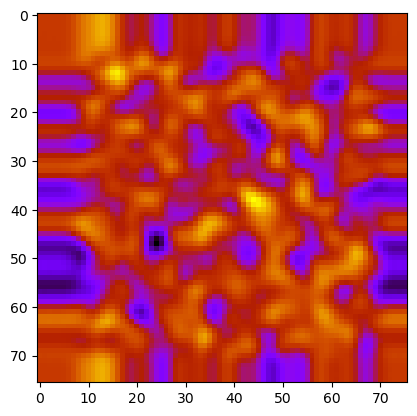

In [22]:
for i in range(4):
    x = signal.convolve2d(x, point_spread_function, boundary="wrap")
plt.imshow(x, cmap="gnuplot")
x = x_copy


In [53]:
def jitter_filter(x=None, N=64):
    jittered_array = np.copy(x)
    for idx in range(N):    
        jitter_vector = np.random.choice(jitter_range_array)
        
        jittered_array[idx] = np.roll(jittered_array[idx], jitter_vector)
    return jittered_array


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

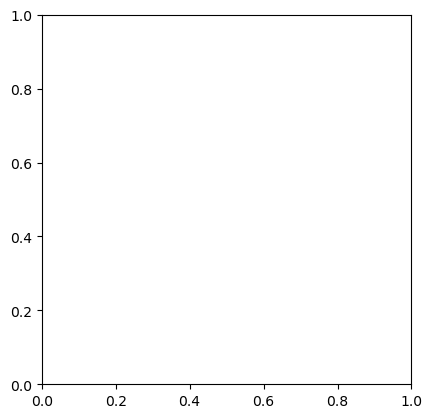

In [69]:
image = datasets.face(gray=True)
# plt.imshow(image, cmap="gray")
image = np.fromfile("/home/giorgio/.cache/scipy-data/face.dat")
jittered_image = (image, image.shape[0])
plt.imshow(jittered_image)

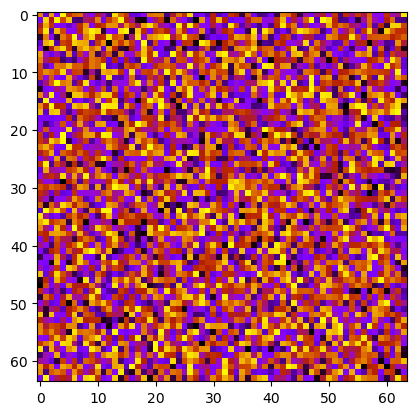

In [55]:
jittered_array = jitter_filter(x, N)
plt.imshow(jittered_array, cmap="gnuplot")